# KNN(BAG OF WORDS)

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

In [2]:
#creating conectionwith the sqlite file
con = sqlite3.connect('final.sqlite') 

#Reading the entire data from the file and storing it into a dataframe...
data = pd.read_sql_query("select * from Reviews", con)
#data.head()

In [57]:
data.shape

(364171, 12)

In [3]:
# sampling 40k random review points...
final_data=data.sample(n=40000)

In [4]:
final_data.shape

(40000, 12)

In [5]:
final_data["Score"].value_counts()

positive    33717
negative     6283
Name: Score, dtype: int64

In [6]:
final_data=final_data.sort_values(by='Time',ascending=True).reset_index()

In [7]:
final_data['Score']=final_data['Score'].map({'negative':0, 'positive':1})

In [8]:
final_data.shape

(40000, 13)

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

C:\Users\vishu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
# Text to vector conversion..for Training dataset
# Creating bag of words on the Training set...
#BoW
count_vect = CountVectorizer() #in scikit-learn
bow = count_vect.fit_transform(final_data["CleanedText"].values)

In [58]:
bow.shape

(40000, 24299)

In [60]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler(with_mean=False).fit_transform(bow)
print(standardized_data.shape)


(40000, 24299)


C:\Users\vishu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [61]:
# split the data set into train and test
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(standardized_data, final_data["Score"].values, test_size=0.3, random_state=0)

In [62]:
Y_train.shape

(28000,)

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation


The optimal number of neighbors is 7.


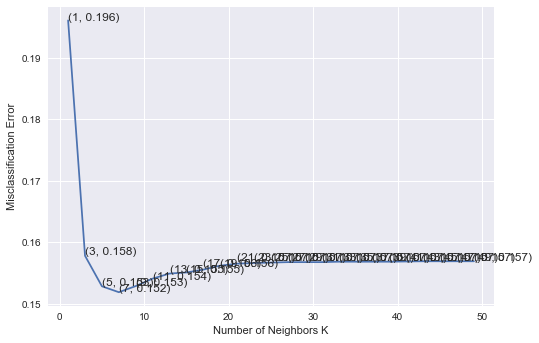

the misclassification error for each k value is :  [ 0.196  0.158  0.153  0.152  0.153  0.154  0.155  0.155  0.156  0.156
  0.157  0.157  0.157  0.157  0.157  0.157  0.157  0.157  0.157  0.157
  0.157  0.157  0.157  0.157  0.157]


In [64]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k_bow = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k_bow)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [66]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal_bow = KNeighborsClassifier(n_neighbors=optimal_k_bow)

# fitting the model
knn_optimal_bow.fit(X_train, Y_train)

# predict the response
pred_bow = knn_optimal_bow.predict(X_test)

# evaluate accuracy
acc_bow = accuracy_score(Y_test, pred_bow) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k_bow, acc_bow))


The accuracy of the knn classifier for k = 7 is 84.750000%


### Confusion -matrix

In [68]:
#Confusion matrix.....
#Classification Report......
results = confusion_matrix(Y_test, pred_bow)
print('CONFUSION MATRIX :')
print()
print(results)
print()
print('ACCURACY SCORE :',accuracy_score(Y_test, pred_bow)) 
print()
print('REPORT : ') 
print(classification_report(Y_test, pred_bow)) 

CONFUSION MATRIX :

[[   92  1756]
 [   74 10078]]

ACCURACY SCORE : 0.8475

REPORT : 
             precision    recall  f1-score   support

          0       0.55      0.05      0.09      1848
          1       0.85      0.99      0.92     10152

avg / total       0.81      0.85      0.79     12000



# KNN(TF-IDF)

In [10]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(final_data['CleanedText'].values)

In [11]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data_tf = StandardScaler(with_mean=False).fit_transform(final_tf_idf)
print(standardized_data_tf.shape)


(40000, 666580)


In [12]:
X_train_tf, X_test_tf, Y_train_tf, Y_test_tf = cross_validation.train_test_split(standardized_data_tf, final_data["Score"].values, test_size=0.3, random_state=0)


The optimal number of neighbors is 1.


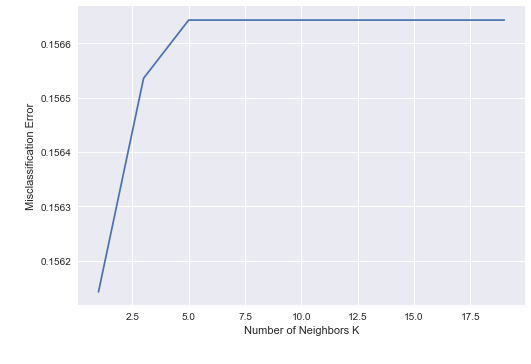

the misclassification error for each k value is :  [ 0.156  0.157  0.157  0.157  0.157  0.157  0.157  0.157  0.157  0.157]


In [13]:
# creating odd list of K for KNN
myList = list(range(0,20))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train_tf, Y_train_tf, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k_tf = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k_tf)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [30]:
optimal_k_tf

1

In [14]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal_tf = KNeighborsClassifier(n_neighbors=optimal_k_tf)

# fitting the model
knn_optimal_tf.fit(X_train_tf, Y_train_tf)

# predict the response
pred_tf = knn_optimal_tf.predict(X_test_tf)

# evaluate accuracy
acc_tf = accuracy_score(Y_test_tf, pred_tf) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k_tf, acc_tf))


The accuracy of the knn classifier for k = 1 is 84.183333%


### confusion-matrix

In [18]:
#Confusion matrix.....
#Classification Report......
results = confusion_matrix(Y_test_tf, pred_tf)
print('CONFUSION MATRIX :')
print()
print(results)
print()
print('ACCURACY SCORE :',accuracy_score(Y_test_tf, pred_tf)) 
print()
print('REPORT : ') 
print(classification_report(Y_test_tf, pred_tf)) 

CONFUSION MATRIX :

[[    0  1897]
 [    1 10102]]

ACCURACY SCORE : 0.841833333333

REPORT : 
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1897
          1       0.84      1.00      0.91     10103

avg / total       0.71      0.84      0.77     12000



# KNN(AVG WORD2VEC)

In [13]:
# Using Google News Word2Vectors
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

C:\Users\vishu\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [40]:
#model.vocab

In [14]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [15]:
import gensim
i=0
list_of_sent=[]
for sent in final_data['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)
    

In [17]:
# # average Word2Vec
# # compute average word2vec for each review.
sent_vectors =[]           # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent:     # for each review/sentence
    sent_vec = np.zeros(300)  # as word vectors are of zero length
    cnt_words =0;             # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in model.vocab:
            vec = model.wv[word]
            sent_vec += vec
            cnt_words += 1
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
# print(len(sent_vectors))
# print(sent_vectors[0])pred_train

C:\Users\vishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':
C:\Users\vishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [21]:
#sent_vectors

In [22]:
word2vec_sent_vectors=np.nan_to_num(sent_vectors)

In [23]:
from sklearn.preprocessing import StandardScaler
standardized_data_avg = StandardScaler().fit_transform(word2vec_sent_vectors)
print(standardized_data_avg.shape)

(40000, 300)


In [24]:
# split the data set into train and test
X_train_w2v, X_test_w2v, Y_train_w2v, Y_test_w2v = cross_validation.train_test_split(standardized_data_avg, final_data["Score"].values, test_size=0.3, random_state=0)


The optimal number of neighbors is 13.


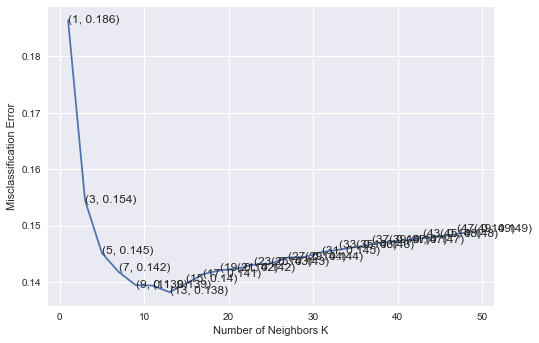

the misclassification error for each k value is :  [ 0.186  0.154  0.145  0.142  0.139  0.139  0.138  0.14   0.141  0.142
  0.142  0.143  0.143  0.144  0.144  0.145  0.146  0.146  0.147  0.147
  0.147  0.148  0.148  0.149  0.149]


In [25]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train_w2v, Y_train_w2v, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k_w2v = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k_w2v)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [28]:
# # ============================== KNN with k = optimal_k ===============================================
# # instantiate learning model k = optimal_k
knn_optimal_w2v = KNeighborsClassifier(n_neighbors=optimal_k_w2v)

# # fitting the model
knn_optimal_w2v.fit(X_train_w2v, Y_train_w2v)
# # predict the response
pred_w2v = knn_optimal_w2v.predict(X_test_w2v)


In [27]:
# evaluate accuracy
acc_w2v = accuracy_score(Y_test_w2v, pred_w2v) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k_w2v, acc_w2v))


The accuracy of the knn classifier for k = 13 is 86.025000%


In [31]:
pred_w2v

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Confusion Matrix

In [37]:
#Confusion matrix.....
#Classification Report......
results = confusion_matrix(Y_test_w2v, pred_w2v)
print('CONFUSION MATRIX :')
print()
print(results)
print()
print('ACCURACY SCORE :',accuracy_score(Y_test_w2v, pred_w2v)) 
print()
print('REPORT : ') 
print(classification_report(Y_test_w2v, pred_w2v)) 

CONFUSION MATRIX :

[[  285  1563]
 [  114 10038]]

ACCURACY SCORE : 0.86025

REPORT : 
             precision    recall  f1-score   support

          0       0.71      0.15      0.25      1848
          1       0.87      0.99      0.92     10152

avg / total       0.84      0.86      0.82     12000



## KNN(TFIDF-W2V)

In [44]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [45]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf1 = tf_idf_vect.fit_transform(final_data['CleanedText'].values)

In [15]:
type(final_tf_idf1)

scipy.sparse.csr.csr_matrix

In [46]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = final_tf_idf1[row, tfidf_feat.index(word)]
            sent_vec += (vec * tfidf)
            weight_sum += tfidf
            
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

C:\Users\vishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


In [47]:
tfidf_sent_vectors_new=np.nan_to_num(tfidf_sent_vectors)

In [48]:
from sklearn.preprocessing import StandardScaler
standardized_data_avg_tf1 = StandardScaler().fit_transform(tfidf_sent_vectors_new)
print(standardized_data_avg_tf1.shape)

(40000, 50)


In [49]:
# split the data set into train and test
X_train_tfw2v, X_test_tfw2v, Y_train_tfw2v, Y_test_tfw2v = cross_validation.train_test_split(standardized_data_avg_tf1, final_data["Score"].values, test_size=0.3, random_state=0)


The optimal number of neighbors is 23.


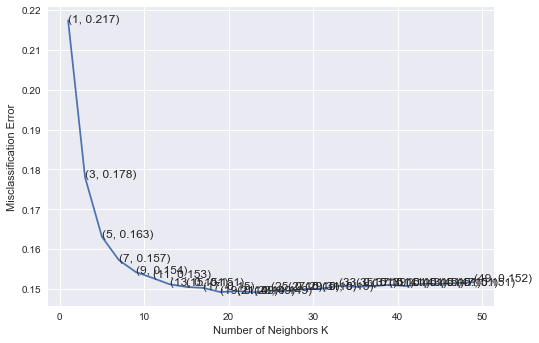

the misclassification error for each k value is :  [ 0.217  0.178  0.163  0.157  0.154  0.153  0.151  0.151  0.15   0.149
  0.149  0.149  0.15   0.15   0.15   0.15   0.151  0.151  0.151  0.151
  0.151  0.151  0.151  0.151  0.152]


In [50]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train_tfw2v, Y_train_tfw2v, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k_tfw2v = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k_tfw2v)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [51]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal_tfw2v = KNeighborsClassifier(n_neighbors=optimal_k_tfw2v)

# fitting the model
knn_optimal_tfw2v.fit(X_train_tfw2v, Y_train_tfw2v)

# predict the response
pred_tfw2v = knn_optimal_tfw2v.predict(X_test_tfw2v)

# evaluate accuracy
acc_tfw2v = accuracy_score(Y_test_tfw2v, pred_tfw2v) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k_tfw2v, acc_tfw2v))


The accuracy of the knn classifier for k = 23 is 85.100000%


### Confusion matrix

In [52]:
#Confusion matrix.....
#Classification Report......
results = confusion_matrix(Y_test_tfw2v, pred_tfw2v)
print('CONFUSION MATRIX :')
print()
print(results)
print()
print('ACCURACY SCORE :',accuracy_score(Y_test_tfw2v, pred_tfw2v)) 
print()
print('REPORT : ') 
print(classification_report(Y_test_tfw2v, pred_tfw2v)) 

CONFUSION MATRIX :

[[  162  1686]
 [  102 10050]]

ACCURACY SCORE : 0.851

REPORT : 
             precision    recall  f1-score   support

          0       0.61      0.09      0.15      1848
          1       0.86      0.99      0.92     10152

avg / total       0.82      0.85      0.80     12000



# Summary

In [ ]:
# import sys
# !{sys.executable} -m pip install prettytable

In [3]:
from prettytable import PrettyTable

In [5]:
from prettytable import PrettyTable
t = PrettyTable(["Sno","MODEL", "HYPERPARAMETER(K)", "TEST Accuracy","TEST ERROR"])
t.add_row([1,"Bag of Words",7,0.8475,0.1525])

In [6]:
t.add_row([2,"TFIDF",1,0.8418,0.1582])
t.add_row([2,"WORD2VEC(GOOGLE PRETRAINED)",13,0.8603,0.1397])
t.add_row([2,"TFIDF-WORD2VEC",23,0.851,0.149])



In [7]:
print(t)

+-----+-----------------------------+-------------------+---------------+------------+
| Sno |            MODEL            | HYPERPARAMETER(K) | TEST Accuracy | TEST ERROR |
+-----+-----------------------------+-------------------+---------------+------------+
|  1  |         Bag of Words        |         7         |     0.8475    |   0.1525   |
|  2  |            TFIDF            |         1         |     0.8418    |   0.1582   |
|  2  | WORD2VEC(GOOGLE PRETRAINED) |         13        |     0.8603    |   0.1397   |
|  2  |        TFIDF-WORD2VEC       |         23        |     0.851     |   0.149    |
+-----+-----------------------------+-------------------+---------------+------------+
